### Import data

In [2]:
import pandas as pd

dataset = pd.read_csv('/Users/Hsuweic/Desktop/AI4healthcare/dataset_categories.csv')
print("Training Set:"% dataset.columns, dataset.shape, len(dataset))
print(dataset.columns)
# test = pd.read_csv('/Users/Hsuweic/Desktop/AI4healthcare/hate speech dataset/test.csv')
# print("Test Set:"% test.columns, test.shape, len(test))

Training Set: (5593, 4) 5593
Index(['Unnamed: 0', 'tweet', 'label', 'categories'], dtype='object')


In [3]:
hate_speech = dataset['label'].sum()
print("Hate speech: ", hate_speech)
print("Non hate speech: ", len(dataset)-hate_speech)


Hate speech:  1430
Non hate speech:  4163


### Data cleaning

In [4]:
import re

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

data_clean = clean_text(dataset, 'tweet')
# print(data_clean.head(10))

### Handle imbalanced data

In [5]:
from sklearn.utils import resample

train_majority = data_clean[data_clean.label == 0]
train_minority = data_clean[data_clean.label == 1]

train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)

train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

label
1    4163
0    4163
Name: count, dtype: int64

### Create a pipeline

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),])

### Model training

In [26]:
from sklearn.model_selection import train_test_split
#the default test_size is 25%
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['label'], test_size=0.2, random_state = 0)
print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)

# print(X_train.head(10))
# print(X_test.head(10))

6660
6660
1666
1666


In [8]:
model = pipeline_sgd.fit(X_train, y_train)

In [9]:
y_predict = model.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9684082624544349

Text(0.5, 1.0, 'Confusion Matrix')

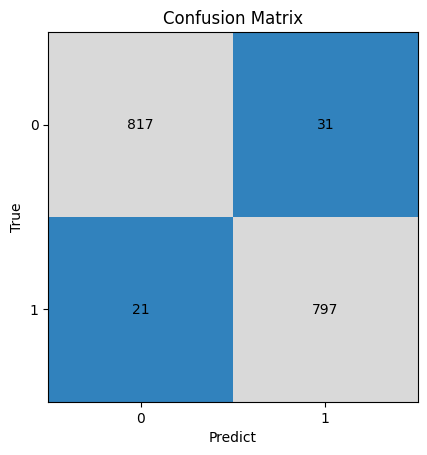

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

grid = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots()
for (j,i),label in np.ndenumerate(grid):
  ax.text(i,j,label,ha='center',va='center')
ax.imshow(grid, cmap = 'tab20c')
ax.set_xticks([1, 0])
ax.set_yticks([1, 0])
ax.set_xlabel('Predict')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

### BERTweet model

In [ ]:
# import torch
# from transformers import AutoModel, AutoTokenizer

# bertweet = AutoModel.from_pretrained("vinai/bertweet-base")

# # For transformers v4.x+:
# tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", use_fast=False)

# # For transformers v3.x:
# # tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")

# # INPUT TWEET IS ALREADY NORMALIZED!
# line = "SC has first two presumptive cases of coronavirus , DHEC confirms HTTPURL via @USER :cry:"

# input_ids = torch.tensor([tokenizer.encode(line)])

# with torch.no_grad():
#     features = bertweet(input_ids)  # Models outputs are now tuples

# # With TensorFlow 2.0+:
# # from transformers import TFAutoModel
# # bertweet = TFAutoModel.from_pretrained("vinai/bertweet-base")